In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Discussion question

After rolling 1 000 000 fair 6-sided dice, which of these histograms would you expect to have a bell shape? Check all that apply. 
1. The histogram of outcomes of these million rolls
1. The histogram that results from computing the average outcome of these million rolls
1. The histogram that results from splitting the outcomes into 1 000 groups of 1 000 (in the order they occurred) and computing the average outcome of each group


**Answer to 1.**

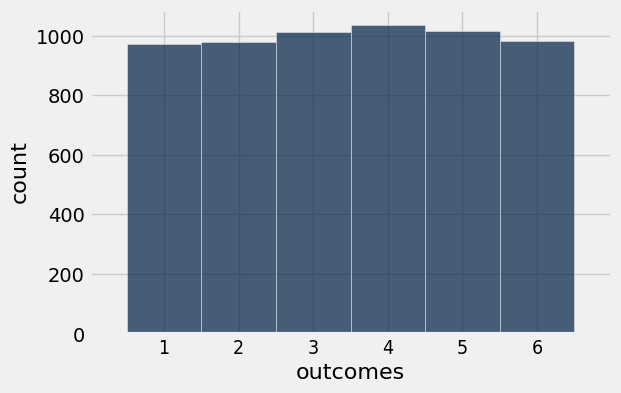

In [27]:
throws = np.random.choice(make_array(1, 2, 3, 4, 5, 6), 6000)
Table().with_columns('outcomes', throws).group_bar('outcomes')

**Answer to 2.**

In [10]:
np.mean(throws)

3.4580000000000002

**Answer to 3.**

First, we execute as stated in the question: we throw  1000 times 1000 throws and take the average each time

In [11]:
total_throws = 1_000_000

def throw_dice_n_times(n):
    return np.random.choice(make_array(1,2,3,4,5,6), n)

averages = make_array()
for thrown in range(1000):
    throws = throw_dice_n_times(1000)
    average = np.mean(throws)
    averages = np.append(averages, average)

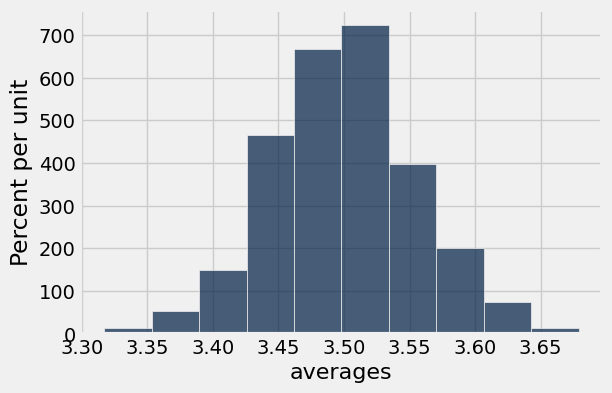

In [12]:
Table().with_columns('averages', averages).hist()

**Bonus**

What happens if instead of groups of 1000, we increase and decrease the group size to 
- 10
- 100
- 1000
- 10000

In [13]:
total_throws = 1_000_000

def throw_dice_n_times(n):
    return np.random.choice(make_array(1,2,3,4,5,6), n)

def make_avg_of_group(n_throws):
    n_groups = int(total_throws/n_throws)
    averages = make_array()
    for thrown in range(n_groups):
        throws = throw_dice_n_times(n_throws)
        average = np.mean(throws)
        averages = np.append(averages, average)
    return averages

In [16]:
%%time
group_10 = make_avg_of_group(10)
group_100 = make_avg_of_group(100)
group_1000 = make_avg_of_group(1000)
group_10000 = make_avg_of_group(10000)

CPU times: user 10.4 s, sys: 41.8 ms, total: 10.5 s
Wall time: 10.6 s


(array([ 0.08595989,  0.88825215,  2.26361032,  5.32951289,  7.02005731,
         7.42120344,  3.61031519,  1.48997135,  0.40114613,  0.14326648]),
 array([ 3.335 ,  3.3699,  3.4048,  3.4397,  3.4746,  3.5095,  3.5444,
         3.5793,  3.6142,  3.6491,  3.684 ]),
 <BarContainer object of 10 artists>)

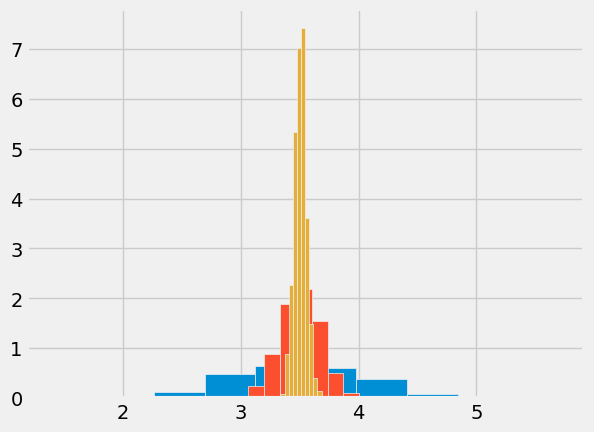

In [18]:
plots.hist(group_10, density=True)
plots.hist(group_100, density=True)
plots.hist(group_1000, density=True)
#plots.hist(group_10000, density=True)